In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import json
import time
from datetime import datetime
import numpy as np
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import pandas as pd
from collections import OrderedDict
import seaborn as sns
sys.path.insert(0, os.path.abspath("../optimizer/"))
sys.path.insert(0, os.path.abspath("../plotting/"))

import utils
import system_comparison_plots
%matplotlib inline


# Old Lambdas

In [3]:
spd_pipeline_one = system_comparison_plots.load_spd_pipeline_one()

In [4]:
ifl_pipeline_one = system_comparison_plots.load_inferline_pipeline_one()

In [5]:
base_path = "/Users/crankshaw/clipper-project/model-comp-project/plots-model-comp-paper/experiments/remove_t_s_e2e_sys_comp_pipeline_one/old_lambdas_new_costs/"

all_results = []

for config in os.listdir(base_path):
    if os.path.splitext(config)[1] == ".json":
        with open(os.path.join(base_path, config)) as f:
            results = json.load(f)
            for r in results:
                all_results.append({
                    "slo": r["slo"],
                    "lambda": r["lam"],
                    "cost": r["cost"],
                    "CV": r["cv"],
                    "name": "ifl-new"
                })
    else:
        print(config)
ifl_df = pd.DataFrame(all_results)


In [6]:
df = pd.concat([ifl_df, spd_pipeline_one, ifl_pipeline_one])

In [8]:
df

,CV,cost,lam_minus_through,lambda,name,slo,slo_miss_rate,slo_plus_25_per_miss_rate,throughput,utilization
0,4.0,7.9165,NaN,115,ifl-new,0.5,NaN,NaN,NaN,NaN
1,4.0,5.3220,NaN,65,ifl-new,0.5,NaN,NaN,NaN,NaN
2,4.0,5.3220,NaN,53,ifl-new,0.5,NaN,NaN,NaN,NaN
3,1.0,20.8890,NaN,765,ifl-new,1.0,NaN,NaN,NaN,NaN
4,1.0,15.7000,NaN,568,ifl-new,1.0,NaN,NaN,NaN,NaN
5,1.0,13.1055,NaN,425,ifl-new,1.0,NaN,NaN,NaN,NaN
6,1.0,10.5110,NaN,375,ifl-new,1.0,NaN,NaN,NaN,NaN
7,1.0,7.9165,NaN,210,ifl-new,1.0,NaN,NaN,NaN,NaN
8,1.0,5.3220,NaN,185,ifl-new,1.0,NaN,NaN,NaN,NaN
9,0.1,20.8890,NaN,483,ifl-new,0.5,NaN,NaN,NaN,NaN


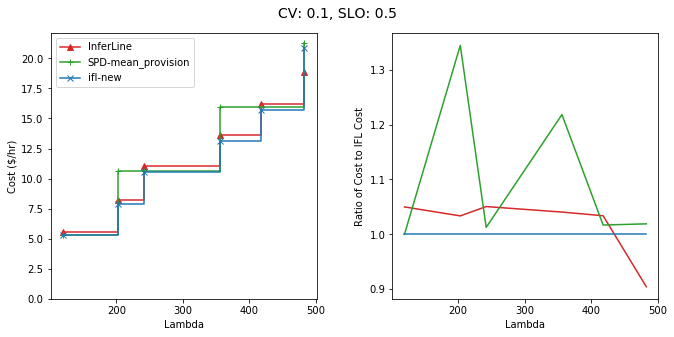

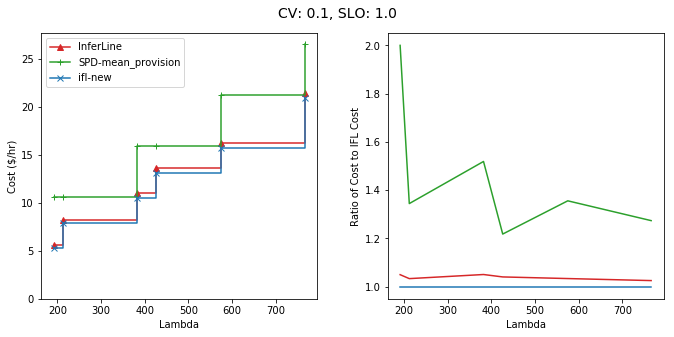

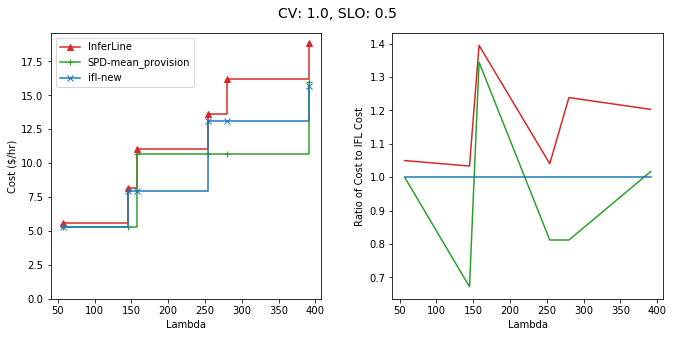

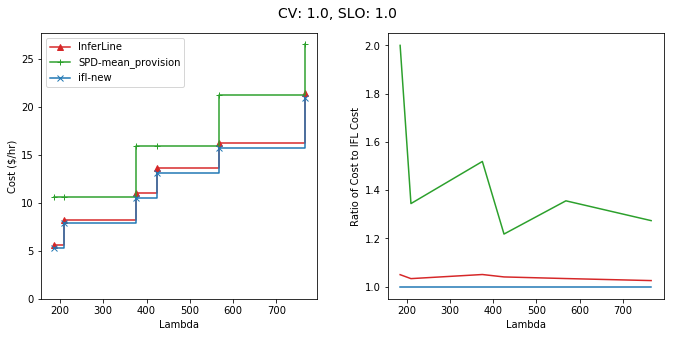

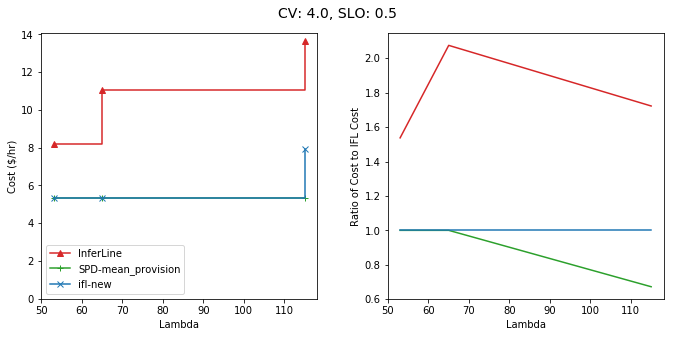

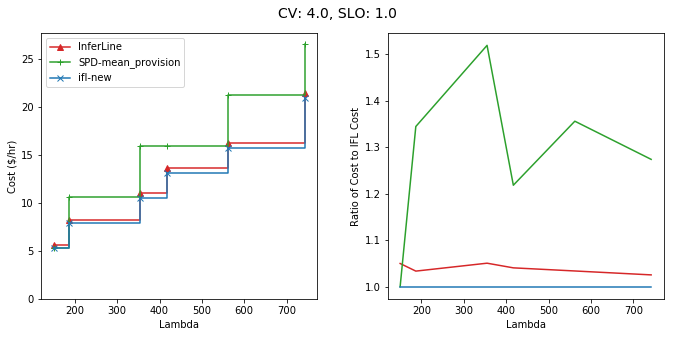

In [17]:
names = df.name.unique()
colors = sns.color_palette(n_colors=len(names))
cmap = dict(zip(names, colors))
ms = ["x", "o", "+", "^"]
mmap = dict(zip(names, ms))

for cv, cv_group in df.groupby(df.CV):
    for slo, slo_group in cv_group.groupby(cv_group.slo):
        if slo == 0.35:
            continue
        fig, (ax_cost, ax_cost_ratio) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        ng = slo_group.groupby(slo_group.name)
        ifl_costs = ng.get_group("ifl-new").sort_values("lambda")
        for name, name_group in ng:
            if name == "SPD-peak_provision":
                continue
            name_group = name_group.sort_values("lambda")
            ax_cost.step(name_group["lambda"], name_group.cost, mmap[name]+"-", where="post", c=cmap[name], label=name)
            try:
                ax_cost_ratio.plot(name_group["lambda"], np.array(name_group.cost) / np.array(ifl_costs.cost), c=cmap[name], label=name)
            except ValueError:
                print(cv,slo,name,)
        ax_cost.set_ylabel("Cost ($/hr)")
        ax_cost.set_xlabel("Lambda")
        ax_cost.set_ylim(bottom=0)
        ax_cost.legend(loc=0)
        ax_cost_ratio.set_ylabel("Ratio of Cost to IFL Cost")
        ax_cost_ratio.set_xlabel("Lambda")
        fig.suptitle("CV: {cv}, SLO: {slo}".format(cv=cv, slo=slo), fontsize=14)
        plt.tight_layout(pad=3)

            
    

# New Lambdas

In [28]:
# Load Inferline configs:
base_path = "/Users/crankshaw/clipper-project/model-comp-project/plots-model-comp-paper/experiments/remove_t_s_e2e_sys_comp_pipeline_one/new_lambdas/"

all_results = []

print(os.listdir(base_path))

for config in os.listdir(base_path):
    if os.path.splitext(config)[1] == ".json":
        with open(os.path.join(base_path, config)) as f:
            results = json.load(f)
            for r in results:
                all_results.append({
                    "slo": r["slo"],
                    "lambda": r["lam"],
                    "cost": r["cost"],
                    "CV": r["cv"],
                    "name": "inferline"
                })
    else:
        print(config)
# ifl_df = pd.DataFrame(all_results)



rep_cost = utils.get_gpu_cost("aws", "v100", 3) + utils.get_cpu_cost("aws", 3)
base_path = "/Users/crankshaw/Downloads/NEW_CONFIGS_COST"
for slo_d in os.listdir(base_path):
    pc = [base_path, slo_d]
    for cv_d in os.listdir(os.path.join(*pc)):
        pc = [base_path, slo_d, cv_d]
        for strat_d in os.listdir(os.path.join(*pc)):
            pc = [base_path, slo_d, cv_d, strat_d]
            for lam_d in os.listdir(os.path.join(*pc)):
                pc = [base_path, slo_d, cv_d, strat_d, lam_d]
                num_reps = 0
                for fname in os.listdir(os.path.join(*pc)):
                    if os.path.splitext(fname)[1] == ".json":
                        if num_reps == 0:
                            with open(os.path.join(*pc, fname)) as f:
                                cur_res = json.load(f)
                                slo = float(cur_res["slo_millis"]) / 1000.0
                                cv = cur_res["cv"]
                                lam = cur_res["lambda"]
                        num_reps += 1
                cost = rep_cost * num_reps
                all_results.append({
                    "slo": slo,
                    "lambda": lam,
                    "cost": cost,
                    "CV": cv,
                    "name": "SPD-{}".format(strat_d)
                })

df = pd.DataFrame(all_results)        

['aws_image_driver_one_ifl_configs_slo_0.5_cv_4.0.json', 'aws_image_driver_one_ifl_configs_slo_1.0_cv_1.0.json', 'aws_image_driver_one_ifl_configs_slo_0.5_cv_0.1.json', 'aws_image_driver_one_ifl_configs_slo_1.0_cv_0.1.json', 'aws_image_driver_one_ifl_configs_slo_1.0_cv_4.0.json', 'aws_image_driver_one_ifl_configs_slo_0.5_cv_1.0.json']


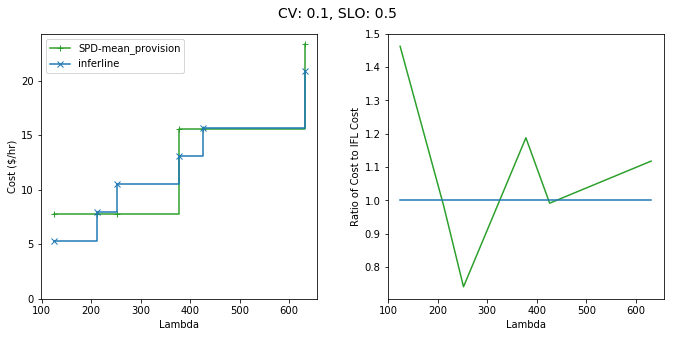

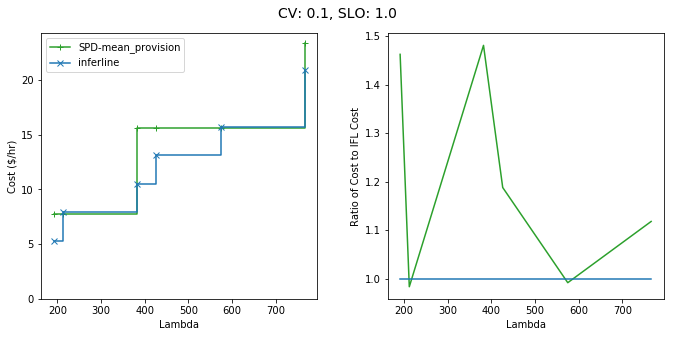

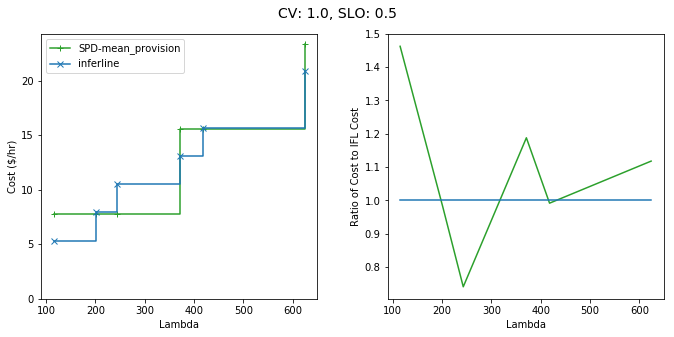

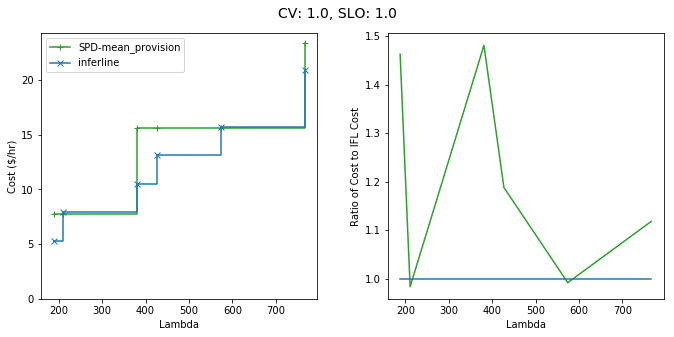

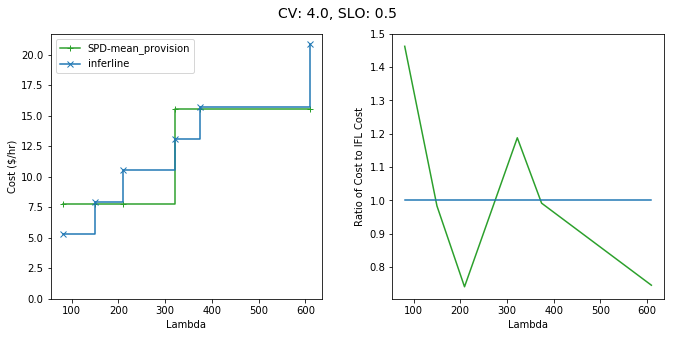

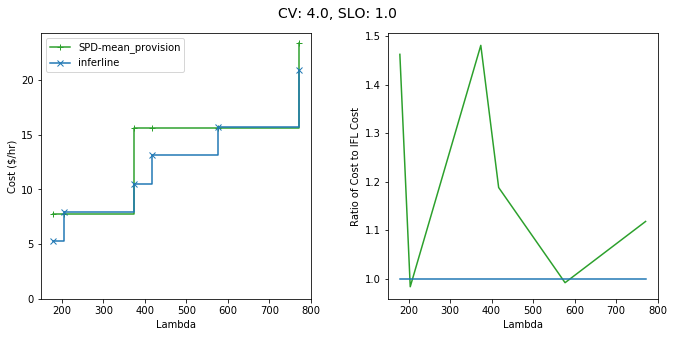

In [30]:
names = df.name.unique()
colors = sns.color_palette(n_colors=len(names))
cmap = dict(zip(names, colors))
ms = ["x", "o", "+"]
mmap = dict(zip(names, ms))

for cv, cv_group in df.groupby(df.CV):
    for slo, slo_group in cv_group.groupby(cv_group.slo):
        if slo == 0.35:
            continue
        fig, (ax_cost, ax_cost_ratio) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
        ng = slo_group.groupby(slo_group.name)
#         print(ng.keys)
        ifl_costs = ng.get_group("inferline").sort_values("lambda")
        for name, name_group in ng:
            if name == "SPD-peak_provision":
                continue
            name_group = name_group.sort_values("lambda")
            ax_cost.step(name_group["lambda"], name_group.cost, mmap[name]+"-", where="post", c=cmap[name], label=name)
#             display(ng.get_group("inferline"))
#             display(ng.get_group(name))
            try:
                ax_cost_ratio.plot(name_group["lambda"], np.array(name_group.cost) / np.array(ifl_costs.cost), c=cmap[name], label=name)
            except ValueError:
                print(cv,slo,name,)
        ax_cost.set_ylabel("Cost ($/hr)")
        ax_cost.set_xlabel("Lambda")
        ax_cost.set_ylim(bottom=0)
        ax_cost.legend(loc=0)
        ax_cost_ratio.set_ylabel("Ratio of Cost to IFL Cost")
        ax_cost_ratio.set_xlabel("Lambda")
        fig.suptitle("CV: {cv}, SLO: {slo}".format(cv=cv, slo=slo), fontsize=14)
        plt.tight_layout(pad=3)